<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%204%3A%20Time%20Series%20Analysis/4_3_Box_Jenkins_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**
## Box-Jenkins Models

In [ ]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement

Forecasting electricity production from wind energy is a crucial problem for operations management in wind turbines. Wind energy is strongly correlated with the wind speed. In this case study forecasting algorithms are applied in wind speed prediction 

In [ ]:
#Dataset import
url='https://drive.google.com/file/d/1-ohfTF75ZOxMfgaVx6minLsxsCiUfObD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,Date,Hour,Temperature,WindSpeed,Humidity,WindDirection,Pressure
0,0,1/6/2015,0,13.4,0.8,85.0,118.0,1018.0
1,1,1/6/2015,1,12.9,0.6,88.0,121.0,1018.2
2,2,1/6/2015,2,12.6,0.7,88.0,164.0,1018.4
3,3,1/6/2015,3,12.8,0.7,88.0,134.0,1018.5
4,4,1/6/2015,4,14.6,0.6,86.0,31.0,1018.7


In [ ]:
wind = df["WindSpeed"]
wind.head()

0    0.8
1    0.6
2    0.7
3    0.7
4    0.6
Name: WindSpeed, dtype: float64

We want to use last day as testing data where as remaining will be used as training data

In [ ]:
wind_train = wind[:-24]
wind_test = wind[-24:]

## ARIMA MODELS

### Autoregressive Models (AR(p))

An autoregressive model of order $p$ can be written as

$$y_t = \phi_0 + \phi_1y_{t-1} + \phi_2y_{t-2} + \dotsi+ \phi_py_{t-p} + ϵ_t$$

MSE Score: 0.46680377613795687


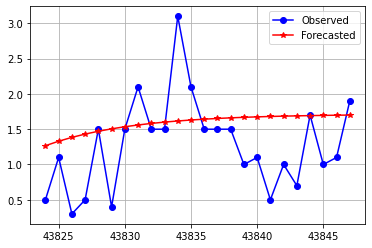

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

mdl = ARIMA(wind_train, order = (2,0,0)).fit()
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(wind_test, ypred))

### Moving Average Models (MA(q))

An moving average model of order $q$ can be written as

$$y_t = \theta_0 + ϵ_t \theta_1ϵ_{t-1} + \theta_2ϵ_{t-2} + \dotsi+ \theta_pϵ_{t-p} $$

where $ϵ$ ~ $N(0,σ^2)$

MSE Score: 0.5785991077377791


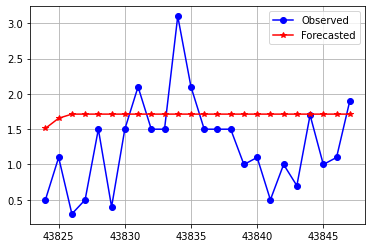

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

mdl = ARIMA(wind_train, order = (0,0,2)).fit()
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(wind_test, ypred))

### Autorregressive Moving Average Models (ARMA(p, q))

An moving average model of order $q$ can be written as

$$y_t = \theta_0 + ϵ_t \theta_1ϵ_{t-1} + \theta_2ϵ_{t-2} + \dotsi+ \theta_pϵ_{t-p} + \phi_1y_{t-1} + \phi_2y_{t-2} + \dotsi+ \phi_py_{t-p} $$

where $ϵ$ ~ $N(0,σ^2)$

MSE Score: 0.46284952236194643


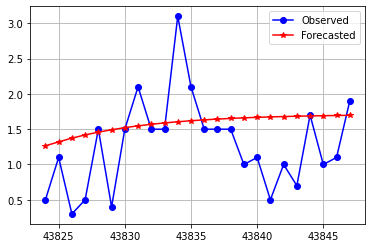

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

mdl = ARIMA(wind_train, order = (2,0,2)).fit()
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(wind_test, ypred))

### Autorregressive Moving Integrated Average Models (ARIMA(p,d, q))

We can use differencing to make time series stationary as follows:

$$y_t^{'} = y_t - y_{t-1}$$


MSE Score: 0.5952250515212202


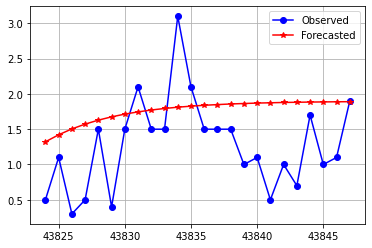

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

mdl = ARIMA(wind_train, order = (2,1,2)).fit()
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(wind_test, ypred))

### Seasonal Autoregressive Moving Average Models(SARIMA(p,d,q)(P,D,Q)m)

ARIMA models also can be used to model seasonality



MSE Score: 0.5387698502127877


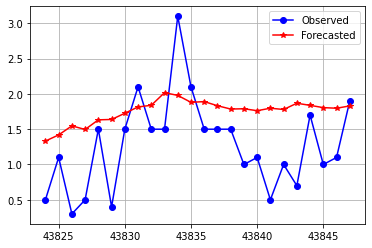

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

mdl = SARIMAX(wind_train, order = (2,1,2), seasonal_order=(1,0,0,24)).fit()
ypred = mdl.predict(wind_test.index[0],wind_test.index[-1])

plt.plot(wind_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(wind_test, ypred))